In [1]:
"""
This ipynb is used to run bootstrap experiments and plot results, as in the paper
"""

'\nThis ipynb is used to run bootstrap experiments and plot results, as in the paper\n'

In [2]:
## The goal of this version is to bootstrap all stats

## This version is moving beyond experiment title stuff

import os
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
from Effect_Estimate import get_effect_iptw_ATE, get_effect_strat, get_effect_match
import pandas as pd 
import scipy.stats as stats
import seaborn as sns


def bootstrap_ATE(P_test, Tt_test, Y_sample, ATE_true, n_it=100):
    runs = []

    for _ in range(n_it):
        bootstrap_inds = np.random.choice(range(len(P_test)), len(P_test))
        runs += [get_effect_iptw_ATE(P_test[bootstrap_inds],
                                     Tt_test[bootstrap_inds],
                                     Y_sample[bootstrap_inds])]
    runs += [ATE_true]
    runs.sort()

    percentile = ((np.where(np.array(runs) == ATE_true)[0][0]).item()/(1.*len(runs)))*100
    
    runs = np.array(runs)
    runs.std()

    return runs.mean(), runs.std(), percentile, runs

In [3]:
# get experimental directories
data_directory = '/projects/bdata2/galen/causal_backups/'

exp_dirs = [name for name in os.listdir(data_directory) if ('_60' in name and name[:3] == 'exp' and os.path.isdir(data_directory+name))] # or ('_40' in name and os.path.isdir(name)) or ('_60' in name and os.path.isdir(name))]
all_exp_dirs = [name for name in os.listdir(data_directory) if (name[:3] == 'exp' and os.path.isdir(data_directory+name))] # or ('_40' in name and os.path.isdir(name)) or ('_60' in name and os.path.isdir(name))]

exp_dirs.remove('experiment_0_0_0_1_0_60_backup')

# get experiment features
get_features = lambda d: [int(v) for v in d.split('_')[1:6]]

# get size
get_size = lambda d: d.split('_')[6]

print(exp_dirs)
print(all_exp_dirs)


['experiment_1_0_0_0_0_60_nuser2000', 'experiment_0_0_0_0_1_60', 'experiment_0_0_0_0_0_60', 'experiment_1_0_0_0_0_60_nuser4000', 'experiment_0_0_0_1_0_60', 'experiment_0_1_0_0_0_60', 'experiment_2_0_0_0_0_60', 'experiment_3_0_0_0_0_60', 'experiment_4_0_0_0_0_60', 'experiment_1_0_0_0_0_60', 'experiment_4_0_0_0_0_60_backup', 'experiment_0_0_1_0_0_60', 'experiment_0_0_0_2_0_60']
['experiment 3', 'experiment_6', 'experiment_3_0_0_0_0_30', 'experiment_1_0_0_0_0_20', 'experiment_realdata_galen', 'experiment_0_0_0_0_2_xsmall', 'experiment_1_0_0_0_0_60_nuser2000', 'experiment_1_xsmall', 'experiment_8_min_pw', 'experiment_0_0_1_0_0_20', 'experiment_0_0_0_0_1_60', 'experiment_backups', 'experiment_0_1_0_0_0_xsmall', 'experiment_8_min', 'experiment_3_xsmall', 'experiment_realdata_suicide_med', 'experiment_0_0_0_0_0_60', 'experiment_6_min', 'experiment_1', 'experiment 4', 'experiment_0_0_0_0_0_xsmall', 'experiment_1_min', 'experiment_1_0_0_0_0_30', 'experiment_realdata_useless_med', 'experiment_0_

In [4]:
"""
AXIS BLOCK

This block of code defines values for bootstrap experiments as well as plotting
A reduced and labelled example:

axis_0 = {'name': 'Linguistic Complexity',


          'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
          
          
          'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.},
          
          
          'labels': ['constant','+sickness','+isolation', '+death' ],
          
          
          # Next, a list of different experiments
          # each corresponds to a value on this axis
          'experiments':[  
          
              # an experiment is a dictionary
              {
              # first, we have a path to the experiment
              'file_path': 'experiment_0_0_0_0_0_60', 
              # the value on the axis. This is mainly for plotting purposes
               'axis_value': 0,
               
               # Next, the causal structure assigned to the experiment during bootstrapping below
               # Y_sample_classes is a list of length 2, denoting: 
               #       [[P(Y=1|class = 0, T=0),   P(Y=1|class = 0, T=1)], [P(Y=1|class = 1, T=0),   P(Y=1|class = 1, T=1)]]
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               # P_sample_classes is: [p(T|class=0), p(T|class=1)]
               'P_sample_classes': [0.9,0.1],
               
               # These values are calculated by hand for plotting purposes, based on the causal structure above
               # unadjusted is for a model that doesn't have access to confounders
               # optimal is for a model that perfectly models the relationship between confounders and T
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}
              },
              
              
              # we have one list element for each 'experiment' or axis value
              ...
          ]}


"""


axis_0 = {'name': 'Linguistic Complexity',
          'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
          'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.},
          'labels': ['constant','+sick','+isolation', '+death' ],
          
          'experiments':[
              {'file_path': 'experiment_0_0_0_0_0_60',
               'axis_value': 0,#0,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}
              },
              
              {'file_path': 'experiment_1_0_0_0_0_60',
               'axis_value': 1,#1,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}},
              
              {'file_path': 'experiment_2_0_0_0_0_60',
               'axis_value': 2,#2,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}},
    
              {'file_path': 'experiment_3_0_0_0_0_60',
               'axis_value': 3,#3,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}},

              {'file_path': 'experiment_4_0_0_0_0_60_backup',
               'axis_value': 4,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}},
              
          ]}

axis_0['experiments'] = axis_0['experiments'][:4]

axis_1 = {'name': 'Signal Intensity',
          'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
          'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.},
          'labels': ['large','small'],
          'experiments':[
              

              
              {'file_path': 'experiment_0_0_0_2_0_60',
               'axis_value': 0,#10,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}},
                
              {'file_path': 'experiment_0_0_0_1_0_60',
               'axis_value': 1,#3,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}},
          ]}

axis_2 = {'name': 'Order of Text',
          'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
          'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.},
          'labels': ['irrelevant','relevant' ],
          'experiments':[
              {'file_path': 'experiment_1_0_0_0_0_60',
               'axis_value': 0,#0,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}},
              
              {'file_path': 'experiment_0_0_1_0_0_60',
               'axis_value': 1,#1,
               'P_sample_classes': [0.9,0.1],
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1.}}
          ]}

axis_3 = {'name': 'Strength of Selection Effect',
          'unadjusted':{'test_acc':(0.5,0.525), 'bias_strat':(-0.32,-0.357), 'bias_ipw':(-0.32,-0.357),'spearman':0.},
          'optimal':{'test_acc':(0.9, 0.925), 'bias_strat':(0.,0.), 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.},
          'labels': ['0.9','0.95'],
          'experiments':[
              {'file_path': 'experiment_1_0_0_0_0_60',
               'axis_value': 0,#0,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
              'P_sample_classes': [0.9,0.1]},
              
              {'file_path': 'experiment_0_0_0_0_1_60',
               'axis_value': 1,#1,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.95,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.27, 'bias_ipw':-0.27,'spearman':0.},
              'optimal':{'test_acc':0.925, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.}}
          ]}

axis_4 = {'name': 'Number of Users',
          'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
          'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.},
          'labels': ['8000','4000', '2000'],
          'experiments':[
              {'file_path': 'experiment_1_0_0_0_0_60',
               'axis_value': 0,#8000,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
               'P_sample_classes': [0.9,0.1],
              'unadjusted':{'test_acc':0.5, 'bias_strat':-0.32, 'bias_ipw':-0.32,'spearman':0.},
              'optimal':{'test_acc':0.9, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.}},
              
              {'file_path': 'experiment_1_0_0_0_0_60_nuser4000',
               'axis_value': 1,#4000,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
              'P_sample_classes': [0.9,0.1]},
              {'file_path': 'experiment_1_0_0_0_0_60_nuser2000',
               'axis_value': 2,#2000,
               'Y_sample_classes': [[0.9,0.1],[0.9,0.9]],
              'P_sample_classes': [0.9,0.1]}
          ]}


axis_5 =  {'name': 'Absence of Treatment Effect',
           'unadjusted':{'test_acc':0.525, 'bias_strat':-0.034, 'bias_ipw':-0.034,'spearman':0.},
           'optimal':{'test_acc':0.925, 'bias_strat':0., 'bias_ipw':0.,'spearman':1., 'mse_ipsw':0.},
           'labels': ['' ],
          'experiments':[
              {'file_path': 'experiment_0_0_0_0_1_60',
               'axis_value': 0,
               'Y_sample_classes': [[0.95,0.05],[0.05,0.95]],
              'P_sample_classes': [0.95,0.1]},

          ]}



list_of_axes = [axis_0, axis_1, axis_2, axis_3, axis_4, axis_5]

In [5]:
"""
This code block runs bootstrap experiments

Given the causal process specified above, it carried out many samples of user
treatment T and outcome Y on the test set, and runs causal analysis across these
stochastic samples for confidence intervals

"""

# list all names of models that were run
model_names = ['oracle','Logistic_Regression_(1gram)',
              'Logistic_Regression','Simple_NN_(1gram)','Simple_NN', 'HBERT']

# this will hold the results of bootstrap experiments
results_dict = {}

# this will hold data frames for plotting
df_list = []

    
    
# iterate over the axes
for axis_experiment in list_of_axes:
#for axis_experiment in [axis_0]: # just run on ling comp for now
    print('\n\n#######\nstarting: {}\n######## '.format(axis_experiment['name']))
    
    for experiment_ in axis_experiment['experiments']:
    
        print('running {}\n\n'.format(experiment_))
        
        exp_name = experiment_['file_path']
        
        results_dict[exp_name] = {}

        

        experiment_bootstraps = []

        show_curves = True

        # autofind model names
        model_names = [name.split('.')[0] for name in os.listdir(data_directory+exp_name) if 'data' not in name and 'inds' not in name and '.pt' not in name]


        ## Get important arrays for statistics
        inds_dict = np.load(data_directory+exp_name + '/inds_dict.npy', allow_pickle=True).item()
        _, _, T, Y, classes = np.load(data_directory+exp_name +'/data.npy', allow_pickle=True)

        P_sample_classes = experiment_['P_sample_classes']
        P_true = P_sample_classes[0]*(1-classes) + P_sample_classes[1]*classes

        Pt_train = P_true[inds_dict['inds_train']]
        Pt_val = P_true[inds_dict['inds_val']]
        Pt_test = P_true[inds_dict['inds_test']]

        Tt_train = T[inds_dict['inds_train']]
        Tt_val = T[inds_dict['inds_val']]
        Tt_test = T[inds_dict['inds_test']]

        classes_test = classes[inds_dict['inds_test']]

        Y_sample_classes = experiment_['Y_sample_classes'] #[[0.9,0.1],[0.9,0.9]]

        #Y_sample_classes = [[0.9,0.1],[0.1,0.9]]


        experiment_['Pt_test'] = Pt_test

        experiment_['Pt_test'] = Pt_test

        Y_sample = np.zeros_like(Pt_test)
        for i in range(len(classes_test)):
            Y_sample[i] = 1.*(random.random() < Y_sample_classes[classes_test[i]][1*(Tt_test[i] == 0)])

        ATE_true = 0.5*((Y_sample_classes[0][0] - 
                         Y_sample_classes[0][1]) + 
                        (Y_sample_classes[1][0] - 
                        Y_sample_classes[1][1]))

        print('true ATE: {}'.format(ATE_true))
        #print('oracle ATE ipw: {}, strat: {}'.format(get_effect_iptw_ATE(Pt_test,Tt_test, Y_sample),
        #                                              get_effect_strat(Pt_test, Tt_test, Y_sample, K=5, value='ATE')[0]))

        bs_result = bootstrap_ATE(Pt_test, Tt_test, Y_sample, ATE_true, n_it=1000)
        bias_of_mean = abs(ATE_true - bs_result[0])
        print('ATE oracle bootstrap: {}'.format(bs_result))
        print('bias of mean: {}'.format(bias_of_mean))
        print('\n\n')
        #print('oracle ATE: {}'.format()) 
        stat_dict_oracle = {'P_test':Pt_test, 'learning_curve':[0], 'test_acc':.9,'test_CE':0}
        np.save(data_directory+'{}/oracle.npy'.format(exp_name), stat_dict_oracle)


        experiment_bootstraps += [{'oracle': bs_result[3]}]

        model_names = [name.split('.')[0] for name in os.listdir(data_directory+exp_name) if 'data' not in name and 'inds' not in name and '.pt' not in name]

        results_dict_local = {}
        for i, model_name in enumerate(model_names):
            print('doing model {}'.format(model_name))


            #try:
            if (True):
                stat_dict = np.load(data_directory+'{}/{}.npy'.format(exp_name, model_name), allow_pickle=True).item()
                results_dict[exp_name][model_name] = {}


                results_dict_local[model_name] = {}
                results_dict_local[model_name]['name'] = model_name

                results_dict_local[model_name]['test_acc'] = []#test_acc
                results_dict_local[model_name]['test_CE'] = []#test_CE

                results_dict_local[model_name]['bias_strat'] = [] #abs(ATE_true - ATE_strat)
                results_dict_local[model_name]['bias_ipw'] = [] #abs(ATE_true - ATE_ipw)
                results_dict_local[model_name]['ATE_strat'] = [] #ATE_strat
                results_dict_local[model_name]['ATE_ipw'] = [] #ATE_ipw

                results_dict_local[model_name]['brier'] = [] #brier
                results_dict_local[model_name]['inv_brier'] = [] #inv_brier
                results_dict_local[model_name]['spearman'] = []
                results_dict_local[model_name]['mse_ipsw'] = []
                
                # galen added
                results_dict_local[model_name]['bias_match_no_caliper']  = []
                results_dict_local[model_name]['bias_match_yes_caliper'] = []
                results_dict_local[model_name]['ATE_match_no_caliper']   = []
                results_dict_local[model_name]['ATE_match_yes_caliper']  = []





                P_test = stat_dict['P_test']

                inds_treated = Tt_test == 1
                inds_control = Tt_test == 0


                Y_0 = np.mean((1 - Tt_test) * (Y_sample/(1 - P_test))   )

                Y_1 = np.mean( (Tt_test) * (Y_sample/(P_test))  ) 

                Yt_0 = np.mean( (1 - Tt_test) * (Y_sample/(1 - Pt_test)) )

                Yt_1 = np.mean( (Tt_test) *  (Y_sample/(Pt_test))  )

                b_1 = np.mean( (Tt_test) *  ((Y_sample/Pt_test) * (P_test - Pt_test)**2/(P_test**2))  )

                b_0 = np.mean( (1 - Tt_test) * ((Y_sample/(1 - Pt_test)) * (P_test - Pt_test)**2/((1 - P_test)**2))   )


                Y_estimates = (Y_0,Y_1)
                bound = (b_0,b_1)

                results_dict_local[model_name]['Y_estimates'] = Y_estimates
                results_dict_local[model_name]['Yt_estimates'] = (Yt_0,Yt_1)
                results_dict_local[model_name]['bound'] = bound

                for _ in range(100):

                    inds_bs = np.random.choice(len(P_test), size=len(P_test), replace=True)

                    P_test_bs = P_test[inds_bs]
                    Pt_test_bs = Pt_test[inds_bs]
                    Tt_test_bs = Tt_test[inds_bs]
                    Y_sample_bs = Y_sample[inds_bs]

                    brier = ((P_test_bs - Pt_test_bs)**2).mean()
                    inv_brier = ((1./P_test_bs - 1./Pt_test_bs)**2).mean()

                    ATE_ipw, weights_ipsw = get_effect_iptw_ATE(P_test_bs, Tt_test_bs, Y_sample_bs, return_weights=True)
                    _, weights_ipw_oracle = get_effect_iptw_ATE(Pt_test_bs, Tt_test_bs, Y_sample_bs, return_weights=True)
                    mse_ipsw = (10**7)*np.mean( (weights_ipsw - weights_ipw_oracle)**2)


                    ATE_strat = get_effect_strat(P_test_bs, Tt_test_bs, Y_sample_bs, K=10, value='ATE')[0]
                    
                    # galen added here
                    ATE_match_no_caliper  = get_effect_match(P_test_bs, Tt_test_bs, Y_sample_bs, randomize=True)
                    ATE_match_yes_caliper = get_effect_match(P_test_bs, Tt_test_bs, Y_sample_bs, caliper=.2, randomize=True)


                    #bias_of_mean = abs(ATE_true - bs_out[0])


                    test_acc = np.sum(((P_test_bs >=0.5)*Tt_test_bs) + (P_test_bs <0.5)*(1-Tt_test_bs))/len(P_test_bs)
                    #np.sum(P_test_bs >=0.5*Tt_test_bs + P_test_bs <0.5*(1-Tt_test_bs))

                    results_dict_local[model_name]['test_acc'] = results_dict_local[model_name]['test_acc']+  [test_acc]#test_acc
                    #results_dict[exp_name][model_name]['test_CE'] = []#test_CE

                    results_dict_local[model_name]['bias_strat'] = results_dict_local[model_name]['bias_strat'] + [ATE_strat - ATE_true] #abs(ATE_true - ATE_strat)
                    results_dict_local[model_name]['bias_ipw'] = results_dict_local[model_name]['bias_ipw']+ [ATE_ipw - ATE_true] #abs(ATE_true - ATE_ipw)
                    results_dict_local[model_name]['ATE_strat'] = results_dict_local[model_name]['ATE_strat']+ [ATE_strat] #ATE_strat
                    results_dict_local[model_name]['ATE_ipw'] = results_dict_local[model_name]['ATE_ipw'] + [ATE_ipw] #ATE_ipw
                    
                    # galen added
                    results_dict_local[model_name]['bias_match_no_caliper']  = results_dict_local[model_name]['bias_match_no_caliper']  + [ATE_match_no_caliper - ATE_true]
                    results_dict_local[model_name]['bias_match_yes_caliper'] = results_dict_local[model_name]['bias_match_yes_caliper'] + [ATE_match_yes_caliper - ATE_true]
                    results_dict_local[model_name]['ATE_match_no_caliper']  = results_dict_local[model_name]['ATE_match_no_caliper'] + [ATE_match_no_caliper]
                    results_dict_local[model_name]['ATE_match_yes_caliper'] = results_dict_local[model_name]['ATE_match_yes_caliper']+ [ATE_match_yes_caliper]

                    results_dict_local[model_name]['brier'] = results_dict_local[model_name]['brier'] + [brier] #brier
                    results_dict_local[model_name]['inv_brier'] = results_dict_local[model_name]['inv_brier'] + [inv_brier] 
                    results_dict_local[model_name]['spearman'] = results_dict_local[model_name]['spearman'] + [stats.spearmanr(P_test, b=Pt_test, axis=0).correlation]
                    results_dict_local[model_name]['mse_ipsw'] = results_dict_local[model_name]['mse_ipsw'] + [mse_ipsw]
                    #experiment_bootstraps += [{model_name: bs_out[3]}]
            experiment_['results_dict'] = results_dict_local





#######
starting: Linguistic Complexity
######## 
running {'file_path': 'experiment_0_0_0_0_0_60', 'axis_value': 0, 'Y_sample_classes': [[0.9, 0.1], [0.9, 0.9]], 'P_sample_classes': [0.9, 0.1], 'unadjusted': {'test_acc': 0.5, 'bias_strat': -0.32, 'bias_ipw': -0.32, 'spearman': 0.0}, 'optimal': {'test_acc': 0.9, 'bias_strat': 0.0, 'bias_ipw': 0.0, 'spearman': 1.0}}


true ATE: 0.4
ATE oracle bootstrap: (0.3850891727210547, 0.022159005616688512, 74.42557442557442, array([0.31618705, 0.32519257, 0.32618099, ..., 0.44683968, 0.45305484,
       0.4555215 ]))
bias of mean: 0.014910827278945327



doing model HBERT
doing model avgBERT
doing model oracle
doing model Simple_NN
doing model Simple_NN_LDA
doing model Logistic_Regression
doing model Logistic_Regression_(1gram)
doing model Simple_NN_(1gram)
doing model Simple_NN_counts
doing model Logistic_Regression_counts
doing model Logistic_Regression_LDA
running {'file_path': 'experiment_1_0_0_0_0_60', 'axis_value': 1, 'Y_sample_classes': [[0

#### 

In [38]:
# define metrics to plot
import seaborn as sns

metrics = ['test_acc','bias_strat', 'bias_ipw', 'bias_ATE_mean','inv_brier'] 

# go from simple names to clear ones
beautify = {
    'test_acc': 'Treatment Accuracy',
    'bias_strat': 'Bias of ATE (Stratified)',
    'bias_ipw': 'Bias of ATE (IPTW)',
    'brier': 'Brier Score',
    'inv_brier': 'Inverse Brier Score',
    'spearman': 'Spearman correlation',
    'bias_match_no_caliper': 'Bias of ATE (Matching, No Caliper)',
    'bias_match_yes_caliper': 'Bias of ATE (Matching)',
    
    0: 'Linguistic Complexity',
    1: 'Presence of Distractors',
    2: 'Post Order as a Feature',
    3: 'Intensity of Features',
    4: 'Complexity of Propensity',
    
    
    'HBERT':'SHERBERT',
     'Logistic_Regression_counts': 'Logistic Regression (1,2-grams, counted)',
     'avgBERT': 'Average Bert',
     'Logistic_Regression_(1gram)': 'Logistic Regression (1-grams)',
     'oracle': 'Oracle Propensity',
     'Simple_NN_counts': 'Simple NN (1,2-grams, counted)',
     'Simple_NN_(1gram)': 'Simple NN (1-grams)',
     'Simple_NN': 'Simple NN (1,2-grams)',
     'Logistic_Regression': 'Logistic Regression (1,2-grams)',
    'Simple_NN_LDA':'Simple NN (LDA features)',
    'Logistic_Regression_LDA': 'Logistic Regression (LDA features)',
    'mse_ipsw':'MSE of IPTW weights (*1e-7)',
    'bound': 'ATE bound'
    
}


sns.color_palette()

model_names_nice = [
    'Logistic Regression (1-grams)',
    'Simple NN (1-grams)',
    'Logistic Regression (1,2-grams)',
     'Simple NN (1,2-grams)',
      'Logistic Regression (1,2-grams, counted)',
     'Simple NN (1,2-grams, counted)',
    'Logistic Regression (LDA features)',
    'Simple NN (LDA features)',
    'SHERBERT',
 'Oracle Propensity',
 'Average Bert',
'Theoretical\nOptimum',
'Unadjusted\nEstimator']

color_map = {key:color for key, color in  zip( model_names_nice, sns.color_palette("Paired"))   }

symbols = ["v","^","<",">", "1","2","3","4","+","X","."]

marker_map = {key:marker for key, marker in  zip( model_names_nice, symbols)   }


# Full Page Results Plots from Paper

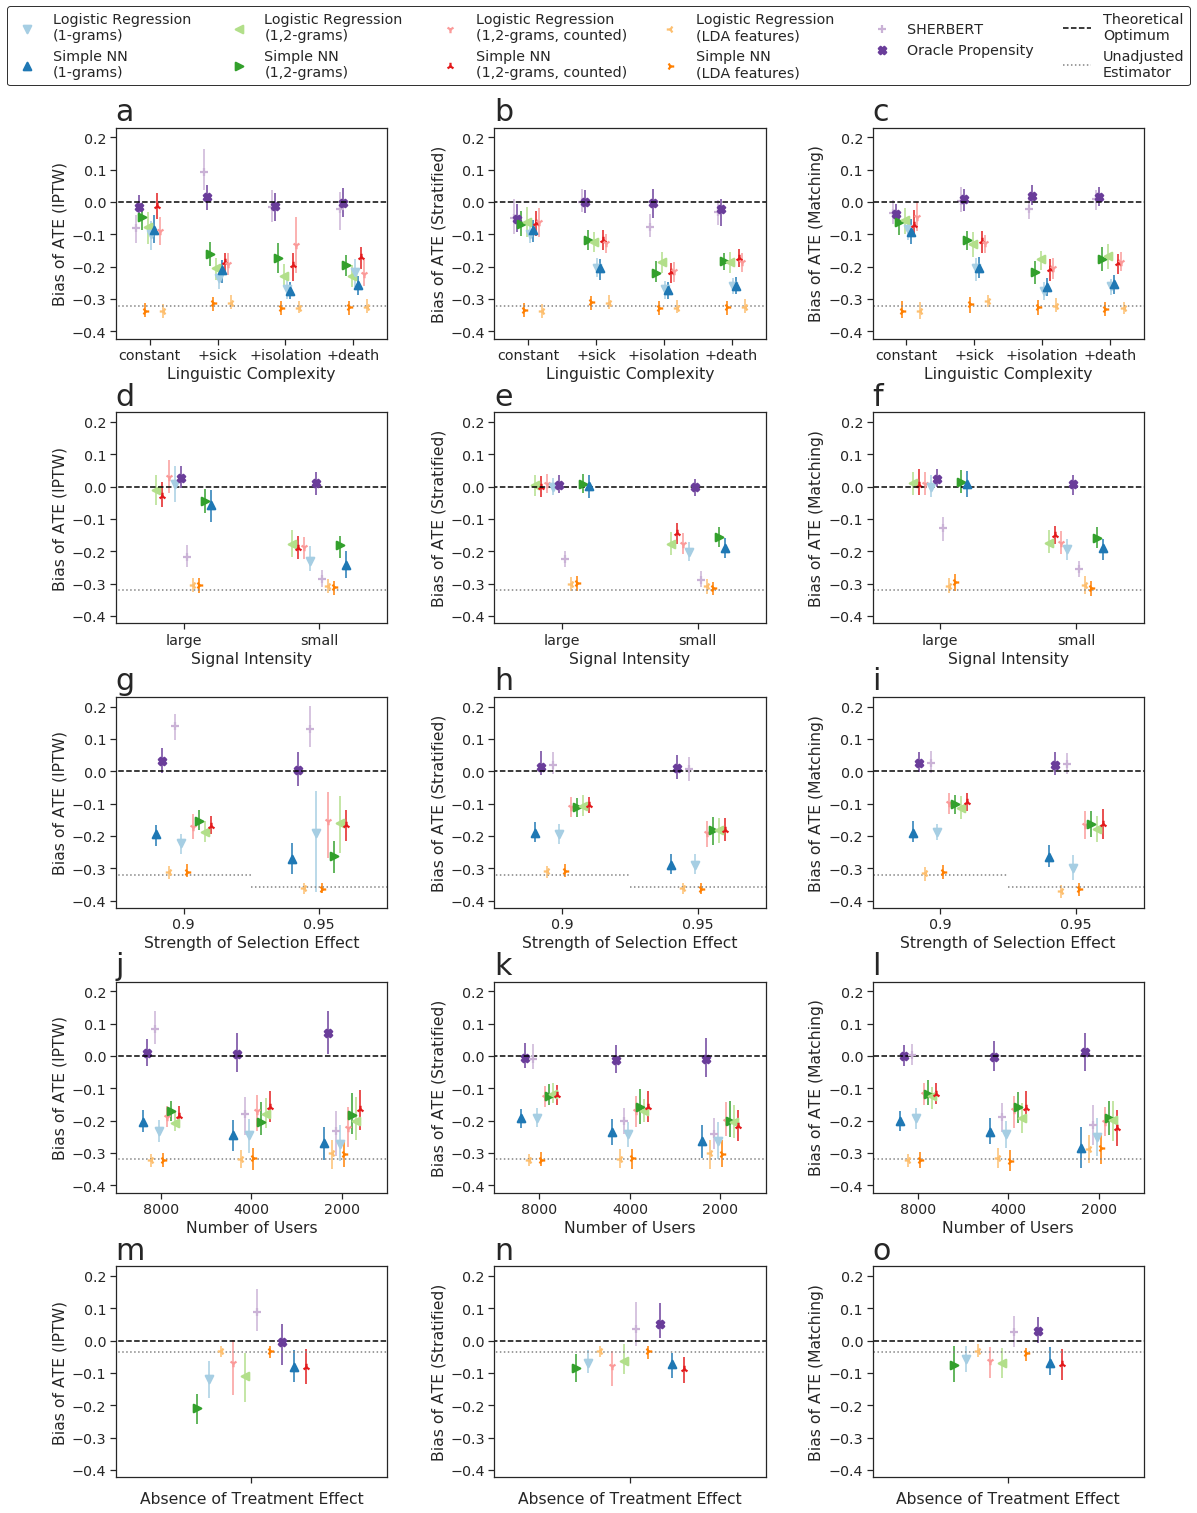

In [45]:
"""
This produces the plot from the original paper

To plot only some of the experiments, change the code block switching on fig
specifically, plots = range(x,y) should give the range of experiments to plot

"""

# choose which metrics to plot for each experiment...
# each of the 5 experiments is a row

plots, save_name = (['test_acc', 'bias_ipw', 'bias_strat'], 'results_main')                      # for main paper body
plots, save_name = (['test_acc',  'mse_ipsw','spearman'], 'results_metrics')                     # for additional metrics in appendix
plots, save_name = (['bias_ipw', 'bias_strat', 'bias_match_yes_caliper'], 'results_estimators')  # for estimators comparison in appendix


experiments = [0, 1, 3, 4, 5] # exclude order of text (number 2)

sns.set_style("white")
sns.set_style("ticks")

#f, axes = plt.subplots(nrows = 5, ncols=3, figsize = (16,20), sharey = 'row', sharex = 'col')
f, axes = plt.subplots(nrows = 5, ncols=3, figsize = (16,20), sharey = 'col' if save_name!='results_estimators' else 'all', sharex = 'row') # share Y axis across rows if plotting biases
sns.set(font_scale=1.3)

for i_1, ax_ in enumerate( experiments ):
    for i_0, target_key in enumerate( plots ):

        keys = []
        vals = []
        ax_vals = []
        bs_intervals = []
        
        symbol_list = []
        
        error_dict = {}

        axis_experiment = list_of_axes[ax_]
        for experiment_ in axis_experiment['experiments']:
        #for  ax_name in ax_names:
            ax_val = experiment_['axis_value']# int(ax_name.split('_')[ax_ + 1])    

            #print(ax_name)

            results_dict = experiment_['results_dict']
            model_names = results_dict.keys()
            model_names = [n for n in model_names if 'avg' not in n]
            for model_name in model_names:


                key = model_name 

                bs_sample = results_dict[model_name][target_key]

                bs_mean = sum(bs_sample)/len(bs_sample)
                lb = bs_mean - np.percentile(bs_sample,2.5)
                ub = np.percentile(bs_sample,97.5) - bs_mean

                vals = vals + [bs_mean]
                keys = keys + [beautify[key]]

                ax_vals = ax_vals + [ax_val]
                bs_intervals = bs_intervals + [(ub,lb)]
                
                error_dict[bs_mean] = (ub,lb)
                
                symbol_list += [marker_map[  beautify[key]]]

                if 'Regression_(1gram)' in key and 'mse' in target_key:
                    #print('here')
                    #print(bs_sample)
                    #print(bs_mean)
                    pass
                #print(len(vals))


        d = {'keys': keys, beautify[target_key]:vals, axis_experiment['name'] :ax_vals, 'intervals':bs_intervals, 'symbols':symbol_list}
        df = pd.DataFrame(data=d)

        
        marker_list = list(df['symbols'])

        

        if 'MSE' in beautify[target_key]:
            axes[i_1, i_0].set_ylim((10**-1, 10**3))
            axes[i_1, i_0].set( yscale="log")

            
        ax = sns.pointplot(data=df,x =axis_experiment['name'],y = beautify[target_key], hue='keys', palette=color_map, dodge=.4, join=False, ci = 'sd' , ax=axes[i_1, i_0], markers = marker_list, scale = 1.1 )
        


        ##
        # Finally, plot custom error bars
        ##


        # get error bar values
        intervals = list(df['intervals'])
        intervals_array = np.array(intervals).transpose()


        # Find the x,y coordinates for each point
        x_coords = []
        y_coords = []
        colors = []
        
        intervals_list = []
        for point_pair in ax.collections:
            color = tuple(point_pair.get_facecolors()[0,:])
            for x, y in point_pair.get_offsets():
                x_coords.append(x)
                y_coords.append(y)
                intervals_list += [error_dict[y]]
                colors.append(color)
        intervals_array = np.array(intervals_list).transpose()


        ax.errorbar(x_coords, y_coords, yerr=intervals_array, ecolor=colors, fmt=' ', zorder=-1)
        
       
        # these should get moved up to the expierments dict on next rerun
        if target_key == 'bias_match_no_caliper':
            axis_experiment['optimal']['bias_match_no_caliper']    = axis_experiment['optimal']['bias_strat']
            axis_experiment['unadjusted']['bias_match_no_caliper'] = axis_experiment['unadjusted']['bias_strat']

        if target_key == 'bias_match_yes_caliper':
            axis_experiment['optimal']['bias_match_yes_caliper']    = axis_experiment['optimal']['bias_strat']
            axis_experiment['unadjusted']['bias_match_yes_caliper'] = axis_experiment['unadjusted']['bias_strat']
        

        
        if target_key in axis_experiment['optimal']:
            
            if type(axis_experiment['optimal'][target_key]) is tuple:
                
                y_val = axis_experiment['optimal'][target_key][0]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,0.5]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='black', linestyle='--')
                ax.set_xlim(xlim)
                
                y_val = axis_experiment['optimal'][target_key][1]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [0.5,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='black', linestyle='--', label = 'Theoretical\nOptimum')
                ax.set_xlim(xlim)
                
            else:
            
                y_val = axis_experiment['optimal'][target_key]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='black', linestyle='--', label = 'Theoretical\nOptimum')
                ax.set_xlim(xlim)

            
        if target_key in axis_experiment['unadjusted']:
            if type(axis_experiment['unadjusted'][target_key]) is tuple:
                y_val = axis_experiment['unadjusted'][target_key][0]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,0.5]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='grey', linestyle=':')
                ax.set_xlim(xlim)
                
                y_val = axis_experiment['unadjusted'][target_key][1]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [0.5,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='grey', linestyle=':',label = 'Unadjusted\nEstimator')
                ax.set_xlim(xlim)
                
            else:
            
                y_val = axis_experiment['unadjusted'][target_key]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='grey', linestyle=':',label = 'Unadjusted\nEstimator')
                ax.set_xlim(xlim)
            
            
        if 'mse' in beautify[target_key]:
            #ax.set_ylim((-5, 40))
            ax.set( yscale="log")
            #ax.ticklabel_format(axis='y', style='sci')
        
        xlim = axes[i_1, i_0].get_xlim()
        ylim = axes[i_1, i_0].get_xlim()
        
        pos = ax.get_position()


        ax.yaxis.set_tick_params(labelleft=True)
        ax.xaxis.set_tick_params(labelbottom=True)
        
        #ax._xticks(range(len(axis_experiment['labels']) ), axis_experiment['labels'])
        ax.set_xticklabels(axis_experiment['labels'])
            

        handles, labels = ax.get_legend_handles_labels()
        inds = [labels.index(n) for n in [name for name in model_names_nice if name in labels]]

        handles_0 = [handles[i] for i in inds]
        labels_0 = [labels[i] for i in inds]
        #ax.legend(handles_0, labels_0, loc = (-0.25,1.05), ncol=4)
        labels_1 = []
        
        for label in labels_0:
            if '(' in label:
                labels_1 += [label.split('(')[0] + '\n(' +label.split('(')[1] ]
            else:
                labels_1 += [label]
        


# make layout tight
plt.tight_layout()          
## add letters
count = 0
for i_1, ax_ in enumerate( experiments ):
    for i_0, target_key in enumerate( plots ):
        ax=axes[i_1, i_0]
        
        
        ax.legend(handles_0, labels_1, facecolor= 'white',edgecolor='black',loc = (-.4,1.2), ncol=6)

        
        if i_0 != 0 or i_1 !=0:
            

            ax.get_legend().remove()
            
        
        
        pos = ax.get_position()
        
        import string
        letters = [s for s in string.ascii_lowercase] + ['aa', 'bb','cc','dd','ee','ff']
        
        #count = (fig - 1)*15 + i_0 + 5*i_1
        letter = letters[count]

        count += 1
        f.text(pos.x0,pos.y1 + 0.005,letter, size=30)
        


from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('figs/{}.pdf'.format(save_name)) as pdf:
    pdf.savefig(f, bbox_inches = 'tight')
    
#plt.tight_layout()
#f.savefig('synth_{}.png'.format(fig),format='png', bbox_inches = 'tight', dpi=100)



# separate plot for order of text experiment

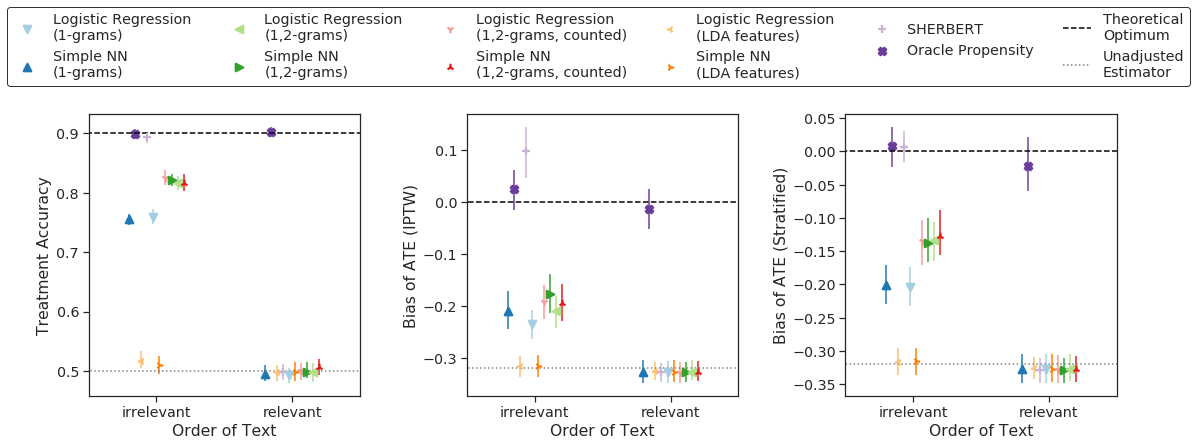

In [59]:
import seaborn as sns


sns.set_style("white")
sns.set_style("ticks")

f, axes = plt.subplots(nrows = 1, ncols=3, figsize = (16,5), sharey = 'none', sharex = 'row')
sns.set(font_scale=1.3)


count = 0
i_1, ax_ = (0, 2) # plot order of text
for i_0, target_key in enumerate(['test_acc', 'bias_ipw', 'bias_strat']):
    #filter_fun = lambda x: axis_check(x, ax_)

    #ax_names = filter(filter_fun, results_dict.keys())



    keys = []
    vals = []
    ax_vals = []
    bs_intervals = []

    symbol_list = []

    error_dict = {}

    axis_experiment = list_of_axes[ax_]
    for experiment_ in axis_experiment['experiments']:
    #for  ax_name in ax_names:
        ax_val = experiment_['axis_value']# int(ax_name.split('_')[ax_ + 1])    

        #print(ax_name)

        results_dict = experiment_['results_dict']
        model_names = results_dict.keys()
        model_names = [n for n in model_names if 'avg' not in n]
        for model_name in model_names:


            key = model_name 

            bs_sample = results_dict[model_name][target_key]

            bs_mean = sum(bs_sample)/len(bs_sample)
            lb = bs_mean - np.percentile(bs_sample,2.5)
            ub = np.percentile(bs_sample,97.5) - bs_mean

            vals = vals + [bs_mean]
            keys = keys + [beautify[key]]

            ax_vals = ax_vals + [ax_val]
            bs_intervals = bs_intervals + [(ub,lb)]

            error_dict[bs_mean] = (ub,lb)

            symbol_list += [marker_map[  beautify[key]]]

            #print( f"On difficulty level {experiment_['file_path']}, {model_name} has error {(ub, lb)}" )



    d = {'keys': keys, beautify[target_key]:vals, axis_experiment['name'] :ax_vals, 'intervals':bs_intervals, 'symbols':symbol_list}
    df = pd.DataFrame(data=d)
    #df.sort_values(by=['keys'])


    marker_list = list(df['symbols'])

    ax = sns.pointplot(data=df, x=axis_experiment['name'], y=beautify[target_key], hue='keys', palette=color_map, dodge=.4, join=False, ci=None , ax=axes[i_0], markers=marker_list, scale=1.1 )



    ##
    # Finally, plot custom error bars
    ##
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    colors = []

    intervals_list = []
    for point_pair in axes[i_0].collections:
        color = tuple(point_pair.get_facecolors()[0,:])
        #for x, y, color in np.hstack(( point_pair.get_offsets(), point_pair.get_facecolors().T)):
        #for ((x, y), color) in zip(point_pair.get_offsets().data, point_pair.get_facecolors()):
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
            intervals_list += [error_dict[y]]
            colors.append(color)
    intervals_array = np.array(intervals_list).transpose()

    
    ax.errorbar(x_coords, y_coords, yerr=intervals_array,
        ecolor=colors, fmt=' ', zorder=-1)

    #ax.legend(loc = (7,7))

    #plt.legend(loc=(100,100))

    if target_key == 'bias_match_no_caliper':
        axis_experiment['optimal']['bias_match_no_caliper'] = 0.0
        axis_experiment['unadjusted']['bias_match_no_caliper'] = -.32

    if target_key == 'bias_match_yes_caliper':
        axis_experiment['optimal']['bias_match_yes_caliper'] = 0.0
        axis_experiment['unadjusted']['bias_match_yes_caliper'] = -.32


    if target_key in axis_experiment['optimal']:
        y_val = axis_experiment['optimal'][target_key]
        xlim = ax.get_xlim()
        ax.set_xlim(xlim)

        x = [-100,100]
        y=[y_val,y_val]
        #ax = sns.lineplot(x,y)
        ax.plot(x,y, color='black', linestyle='--', label = 'Theoretical\nOptimum')
        ax.set_xlim(xlim)


    if target_key in axis_experiment['unadjusted']:
        y_val = axis_experiment['unadjusted'][target_key]
        xlim = ax.get_xlim()
        ax.set_xlim(xlim)

        x = [-100,100]
        y=[y_val,y_val]
        #ax = sns.lineplot(x,y)
        ax.plot(x,y, color='grey', linestyle=':',label = 'Unadjusted\nEstimator')
        ax.set_xlim(xlim)



    xlim = axes[i_0].get_xlim()
    ylim = axes[i_0].get_xlim()

    pos = ax.get_position()


    import string
    letters = [s for s in string.ascii_lowercase] + ['aa', 'bb','cc','dd','ee','ff']
    letter = letters[count]
    count += 1

    #f.text(pos.x0,pos.y1,letter, size=30)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.xaxis.set_tick_params(labelbottom=True)

    #ax._xticks(range(len(axis_experiment['labels']) ), axis_experiment['labels'])
    ax.set_xticklabels(axis_experiment['labels'])


    handles, labels = ax.get_legend_handles_labels()
    inds = [labels.index(n) for n in [name for name in model_names_nice if name in labels]]

    handles_0 = [handles[i] for i in inds]
    labels_0 = [labels[i] for i in inds]
    #ax.legend(handles_0, labels_0, loc = (-0.25,1.05), ncol=4)
    labels_1 = []

    for label in labels_0:
        if '(' in label:
            labels_1 += [label.split('(')[0] + '\n(' +label.split('(')[1] ]
        else:
            labels_1 += [label]
                
# make layout tight
## add letters
plt.tight_layout()          
for i_0, target_key in enumerate(['test_acc', 'bias_ipw', 'bias_strat']):
    ax=axes[i_0]


    ax.legend(handles_0, labels_1, facecolor= 'white',edgecolor='black',loc = (-.3,1.1), ncol=6)


    if i_0 != 0 or i_1 !=0:


        ax.get_legend().remove()


from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('figs/order_of_text.pdf') as pdf:
    pdf.savefig(f, bbox_inches = 'tight')
        

# plot just the different Bias, to see how our implementation of matching works

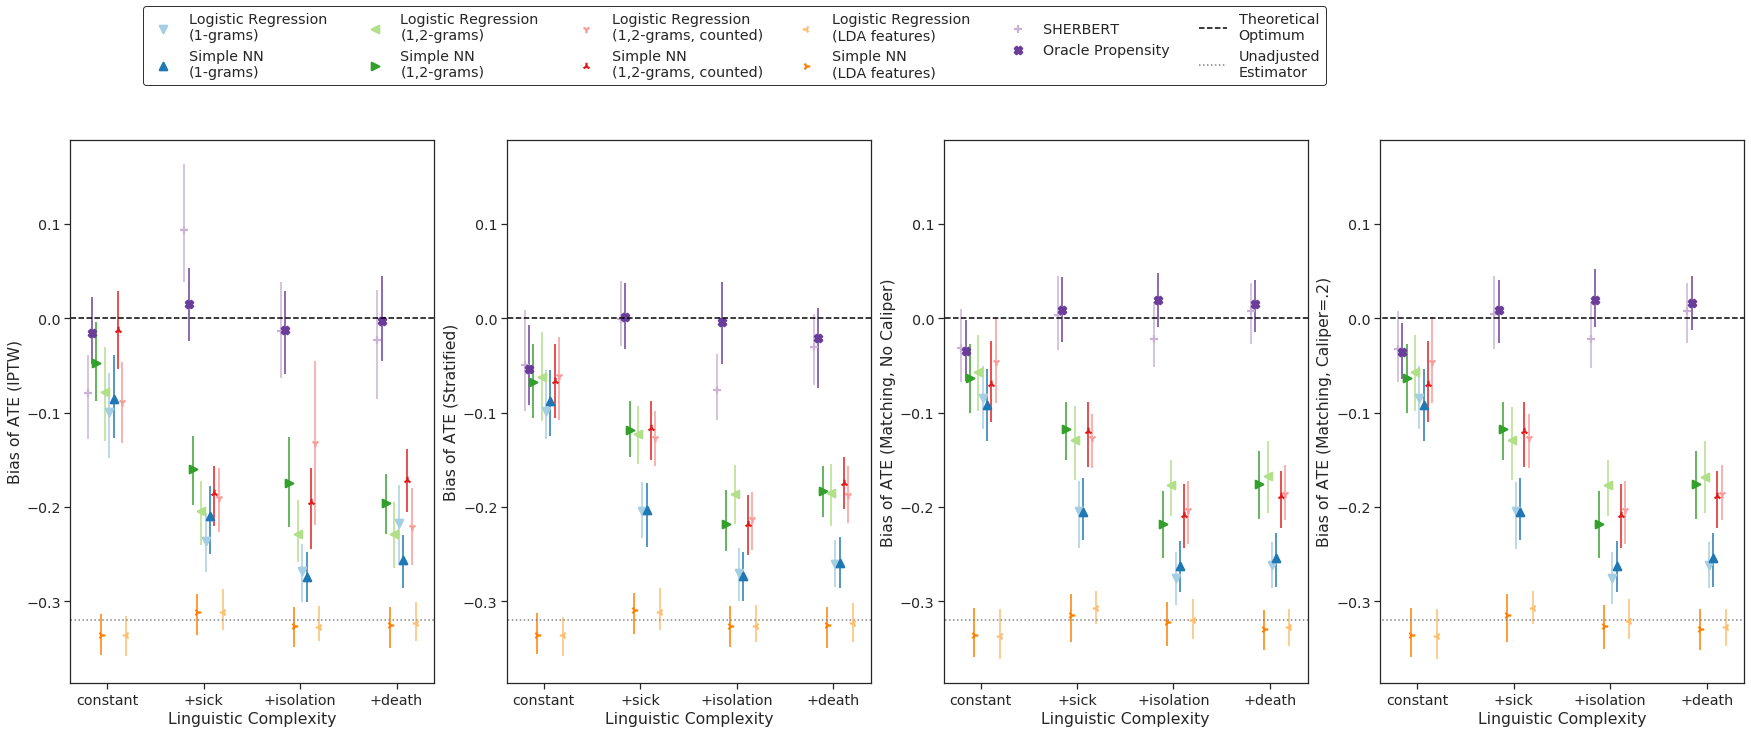

In [8]:
import seaborn as sns


sns.set_style("white")
sns.set_style("ticks")

f, axes = plt.subplots(nrows = 1, ncols=4, figsize = (30,10), sharey = 'row', sharex = 'col')
sns.set(font_scale=1.3)

plots = [0]

count = 0
i_1, ax_ = (0, 0)
for i_0, target_key in enumerate(['bias_ipw', 'bias_strat', 'bias_match_no_caliper', 'bias_match_yes_caliper']):
    #filter_fun = lambda x: axis_check(x, ax_)

    #ax_names = filter(filter_fun, results_dict.keys())



    keys = []
    vals = []
    ax_vals = []
    bs_intervals = []

    symbol_list = []

    error_dict = {}

    axis_experiment = list_of_axes[ax_]
    for experiment_ in axis_experiment['experiments']:
    #for  ax_name in ax_names:
        ax_val = experiment_['axis_value']# int(ax_name.split('_')[ax_ + 1])    

        #print(ax_name)

        results_dict = experiment_['results_dict']
        model_names = results_dict.keys()
        model_names = [n for n in model_names if 'avg' not in n]
        for model_name in model_names:


            key = model_name 

            bs_sample = results_dict[model_name][target_key]

            bs_mean = sum(bs_sample)/len(bs_sample)
            lb = bs_mean - np.percentile(bs_sample,2.5)
            ub = np.percentile(bs_sample,97.5) - bs_mean

            vals = vals + [bs_mean]
            keys = keys + [beautify[key]]

            ax_vals = ax_vals + [ax_val]
            bs_intervals = bs_intervals + [(ub,lb)]

            error_dict[bs_mean] = (ub,lb)

            symbol_list += [marker_map[  beautify[key]]]

            #print( f"On difficulty level {experiment_['file_path']}, {model_name} has error {(ub, lb)}" )



    d = {'keys': keys, beautify[target_key]:vals, axis_experiment['name'] :ax_vals, 'intervals':bs_intervals, 'symbols':symbol_list}
    df = pd.DataFrame(data=d)
    #df.sort_values(by=['keys'])


    marker_list = list(df['symbols'])

    ax = sns.pointplot(data=df, x=axis_experiment['name'], y=beautify[target_key], hue='keys', palette=color_map, dodge=.4, join=False, ci=None , ax=axes[i_0], markers=marker_list, scale=1.1 )



    ##
    # Finally, plot custom error bars
    ##
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    colors = []

    intervals_list = []
    for point_pair in axes[i_0].collections:
        color = tuple(point_pair.get_facecolors()[0,:])
        #for x, y, color in np.hstack(( point_pair.get_offsets(), point_pair.get_facecolors().T)):
        #for ((x, y), color) in zip(point_pair.get_offsets().data, point_pair.get_facecolors()):
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
            intervals_list += [error_dict[y]]
            colors.append(color)
    intervals_array = np.array(intervals_list).transpose()

    
    ax.errorbar(x_coords, y_coords, yerr=intervals_array,
        ecolor=colors, fmt=' ', zorder=-1)

    #ax.legend(loc = (7,7))

    #plt.legend(loc=(100,100))

    if target_key == 'bias_match_no_caliper':
        axis_experiment['optimal']['bias_match_no_caliper'] = 0.0
        axis_experiment['unadjusted']['bias_match_no_caliper'] = -.32

    if target_key == 'bias_match_yes_caliper':
        axis_experiment['optimal']['bias_match_yes_caliper'] = 0.0
        axis_experiment['unadjusted']['bias_match_yes_caliper'] = -.32


    if target_key in axis_experiment['optimal']:
        y_val = axis_experiment['optimal'][target_key]
        xlim = ax.get_xlim()
        ax.set_xlim(xlim)

        x = [-100,100]
        y=[y_val,y_val]
        #ax = sns.lineplot(x,y)
        ax.plot(x,y, color='black', linestyle='--', label = 'Theoretical\nOptimum')
        ax.set_xlim(xlim)


    if target_key in axis_experiment['unadjusted']:
        y_val = axis_experiment['unadjusted'][target_key]
        xlim = ax.get_xlim()
        ax.set_xlim(xlim)

        x = [-100,100]
        y=[y_val,y_val]
        #ax = sns.lineplot(x,y)
        ax.plot(x,y, color='grey', linestyle=':',label = 'Unadjusted\nEstimator')
        ax.set_xlim(xlim)



    xlim = axes[i_0].get_xlim()
    ylim = axes[i_0].get_xlim()

    pos = ax.get_position()


    import string
    letters = [s for s in string.ascii_lowercase] + ['aa', 'bb','cc','dd','ee','ff']
    letter = letters[count]
    count += 1

    #f.text(pos.x0,pos.y1,letter, size=30)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.xaxis.set_tick_params(labelbottom=True)

    #ax._xticks(range(len(axis_experiment['labels']) ), axis_experiment['labels'])
    ax.set_xticklabels(axis_experiment['labels'])


    handles, labels = ax.get_legend_handles_labels()
    inds = [labels.index(n) for n in [name for name in model_names_nice if name in labels]]

    handles_0 = [handles[i] for i in inds]
    labels_0 = [labels[i] for i in inds]
    #ax.legend(handles_0, labels_0, loc = (-0.25,1.05), ncol=4)
    labels_1 = []

    for label in labels_0:
        if '(' in label:
            labels_1 += [label.split('(')[0] + '\n(' +label.split('(')[1] ]
        else:
            labels_1 += [label]
                
# make layout tight
## add letters
for i_1, ax_ in list(enumerate(plots)):
    for i_0, target_key in enumerate(['bias_ipw', 'bias_strat', 'bias_match_no_caliper', 'bias_match_no_caliper']):
        ax=axes[i_0]
        
        
        ax.legend(handles_0, labels_1, facecolor= 'white',edgecolor='black',loc = (.2,1.1), ncol=6)

        
        if i_0 != 0 or i_1 !=0:
            

            ax.get_legend().remove()
            
        
        
        pos = ax.get_position()

        
        

# Peter's plot from earlier revision

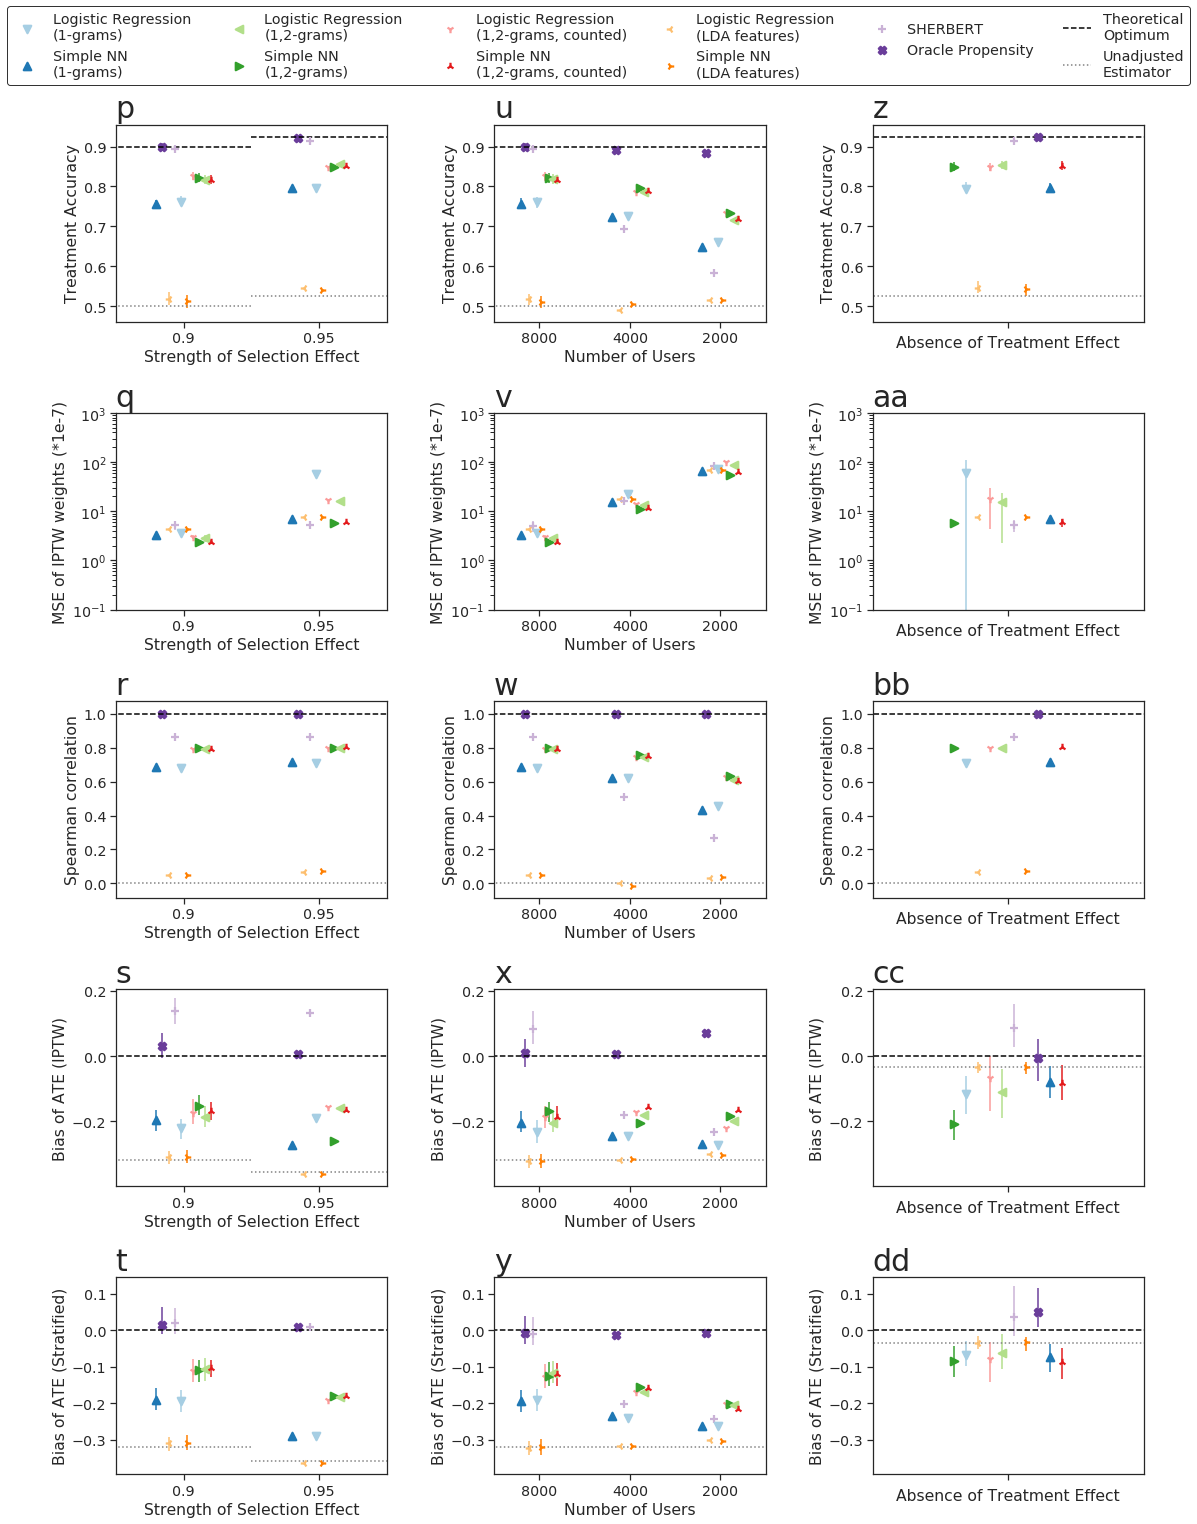

In [20]:
"""
This produces the plot from the original paper

To plot only some of the experiments, change the code block switching on fig
specifically, plots = range(x,y) should give the range of experiments to plot

"""

# choose which page of figures to plot...
fig = 2


sns.set_style("white")
sns.set_style("ticks")

f, axes = plt.subplots(nrows = 5, ncols=3, figsize = (16,20), sharey = 'row', sharex = 'col')
sns.set(font_scale=1.3)

if fig == 1:
    plots = range(0,3)
elif fig == 2:
    plots = range(3,6)
else:
    assert(False)

count = 0
for i_1, ax_ in list(enumerate(plots)):
    for i_0, target_key in enumerate(['test_acc',  'mse_ipsw','spearman','bias_ipw', 'bias_strat']):
        #filter_fun = lambda x: axis_check(x, ax_)

        #ax_names = filter(filter_fun, results_dict.keys())
        
        


        keys = []
        vals = []
        ax_vals = []
        bs_intervals = []
        
        symbol_list = []
        
        error_dict = {}

        axis_experiment = list_of_axes[ax_]
        for experiment_ in axis_experiment['experiments']:
        #for  ax_name in ax_names:
            ax_val = experiment_['axis_value']# int(ax_name.split('_')[ax_ + 1])    

            #print(ax_name)

            results_dict = experiment_['results_dict']
            model_names = results_dict.keys()
            model_names = [n for n in model_names if 'avg' not in n]
            for model_name in model_names:


                key = model_name 

                bs_sample = results_dict[model_name][target_key]

                bs_mean = sum(bs_sample)/len(bs_sample)
                lb = bs_mean - np.percentile(bs_sample,2.5)
                ub = np.percentile(bs_sample,97.5) - bs_mean

                vals = vals + [bs_mean]
                keys = keys + [beautify[key]]

                ax_vals = ax_vals + [ax_val]
                bs_intervals = bs_intervals + [(ub,lb)]
                
                error_dict[bs_mean] = (ub,lb)
                
                symbol_list += [marker_map[  beautify[key]]]

                if 'Regression_(1gram)' in key and 'mse' in target_key:
                    #print('here')
                    #print(bs_sample)
                    #print(bs_mean)
                    pass
                #print(len(vals))


        d = {'keys': keys, beautify[target_key]:vals, axis_experiment['name'] :ax_vals, 'intervals':bs_intervals, 'symbols':symbol_list}
        df = pd.DataFrame(data=d)
        #df.sort_values(by=['keys'])

        
        marker_list = list(df['symbols'])
        #print(target_key)
        #print(df)
        #plt.figure(figsize=(8,8))
        

        if 'MSE' in beautify[target_key]:
            axes[i_0, i_1].set_ylim((10**-1, 10**3))
            axes[i_0, i_1].set( yscale="log")

            
        ax = sns.pointplot(data=df,x =axis_experiment['name'],y = beautify[target_key], hue='keys', palette=color_map, dodge=.4, join=False, ci = 'sd' , ax=axes[i_0, i_1], markers = marker_list, scale = 1.1 )
        

        

        


        #plt.title('{} for {}'.format(beautify[target_key], beautify[ax_]), size = 15)
        




        ##
        # Finally, plot custom error bars
        ##


        # get error bar values
        intervals = list(df['intervals'])
        intervals_array = np.array(intervals).transpose()


        # Find the x,y coordinates for each point
        x_coords = []
        y_coords = []
        colors = []
        
        intervals_list = []
        for point_pair in ax.collections:
            for ((x, y), color) in zip(point_pair.get_offsets(), point_pair.get_facecolors()):
                x_coords.append(x)
                y_coords.append(y)
                intervals_list += [error_dict[y]]
                colors.append(color)
        intervals_array = np.array(intervals_list).transpose()

        # Calculate the type of error to plot as the error bars
        # Make sure the order is the same as the points were looped over
        #errors = tips.groupby(['smoker', 'sex']).std()['tip']
        #colors = ['steelblue']*2 + ['coral']*2
        ax.errorbar(x_coords, y_coords, yerr=intervals_array,
            ecolor=colors, fmt=' ', zorder=-1)
        
        #ax.legend(loc = (7,7))
        
        #plt.legend(loc=(100,100))
        
        
        if target_key in axis_experiment['optimal']:
            
            if type(axis_experiment['optimal'][target_key]) is tuple:
                
                y_val = axis_experiment['optimal'][target_key][0]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,0.5]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='black', linestyle='--')
                ax.set_xlim(xlim)
                
                y_val = axis_experiment['optimal'][target_key][1]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [0.5,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='black', linestyle='--', label = 'Theoretical\nOptimum')
                ax.set_xlim(xlim)
                
            else:
            
                y_val = axis_experiment['optimal'][target_key]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='black', linestyle='--', label = 'Theoretical\nOptimum')
                ax.set_xlim(xlim)

            
        if target_key in axis_experiment['unadjusted']:
            if type(axis_experiment['unadjusted'][target_key]) is tuple:
                y_val = axis_experiment['unadjusted'][target_key][0]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,0.5]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='grey', linestyle=':')
                ax.set_xlim(xlim)
                
                y_val = axis_experiment['unadjusted'][target_key][1]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [0.5,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='grey', linestyle=':',label = 'Unadjusted\nEstimator')
                ax.set_xlim(xlim)
                
            else:
            
                y_val = axis_experiment['unadjusted'][target_key]
                xlim = ax.get_xlim()
                ax.set_xlim(xlim)

                x = [-100,100]
                y=[y_val,y_val]
                #ax = sns.lineplot(x,y)
                ax.plot(x,y, color='grey', linestyle=':',label = 'Unadjusted\nEstimator')
                ax.set_xlim(xlim)
            
        '''
        if 'Bias' in beautify[target_key]:     
            print('BIAS!!!')
            xlim = ax.get_xlim()
            ax.set_xlim(xlim)
            print(x)
            print((i_1,i_0))
            x = [-10,10]
            y=[0,0]
            #ax = sns.lineplot(x,y)
            ax.plot(x,y, color='lightgrey', linestyle='--')
            ax.set_xlim(xlim)
            
        if 'Accuracy' in beautify[target_key]:
            print('BIAS!!!')
            xlim = ax.get_xlim()
            ax.set_xlim(xlim)

            x = [-10,10]
            y=[0.9,0.9]
            #ax = sns.lineplot(x,y)
            ax.plot(x,y, color='lightgrey', linestyle='--')
            ax.set_xlim(xlim)
            
            x = [-10,10]
            y=[0.5,0.5]
            #ax = sns.lineplot(x,y)
            ax.plot(x,y, color='lightgrey', linestyle=':')
            ax.set_xlim(xlim)
        '''
            
        if 'mse' in beautify[target_key]:
            #ax.set_ylim((-5, 40))
            ax.set( yscale="log")
            #ax.ticklabel_format(axis='y', style='sci')
        
        xlim = axes[i_0, i_1].get_xlim()
        ylim = axes[i_0, i_1].get_xlim()
        
        pos = ax.get_position()

        
        import string
        letters = [s for s in string.ascii_lowercase] + ['aa', 'bb','cc','dd','ee','ff']
        letter = letters[count]
        count += 1
        
        #f.text(pos.x0,pos.y1,letter, size=30)
        ax.yaxis.set_tick_params(labelleft=True)
        ax.xaxis.set_tick_params(labelbottom=True)
        
        #ax._xticks(range(len(axis_experiment['labels']) ), axis_experiment['labels'])
        ax.set_xticklabels(axis_experiment['labels'])
            

        handles, labels = ax.get_legend_handles_labels()
        inds = [labels.index(n) for n in [name for name in model_names_nice if name in labels]]

        handles_0 = [handles[i] for i in inds]
        labels_0 = [labels[i] for i in inds]
        #ax.legend(handles_0, labels_0, loc = (-0.25,1.05), ncol=4)
        labels_1 = []
        
        for label in labels_0:
            if '(' in label:
                labels_1 += [label.split('(')[0] + '\n(' +label.split('(')[1] ]
            else:
                labels_1 += [label]
        

        #if i_0 == 0:
        #ax.set_xlabel(beautify[ax_], size = 15 )
        #if i_1 == 0:
        #ax.set_ylabel(beautify[target_key], size = 15 )
            
            
# make layout tight
plt.tight_layout()          
## add letters
for i_1, ax_ in list(enumerate(plots)):
    for i_0, target_key in enumerate(['test_acc',  'mse_ipsw','spearman','bias_ipw', 'bias_strat']):
        ax=axes[i_0, i_1]
        
        
        ax.legend(handles_0, labels_1, facecolor= 'white',edgecolor='black',loc = (-.4,1.2), ncol=6)

        
        if i_0 != 0 or i_1 !=0:
            

            ax.get_legend().remove()
            
        
        
        pos = ax.get_position()
        
        import string
        letters = [s for s in string.ascii_lowercase] + ['aa', 'bb','cc','dd','ee','ff']
        
        count = (fig - 1)*15 + i_0 + 5*i_1
        letter = letters[count]
        count += 1
        f.text(pos.x0,pos.y1 + 0.005,letter, size=30)
        


from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('synth_{}.pdf'.format(fig)) as pdf:
    pdf.savefig(f, bbox_inches = 'tight')
    
#plt.tight_layout()
f.savefig('synth_{}.png'.format(fig),format='png', bbox_inches = 'tight', dpi=100)



In [9]:
axis_0.keys()

dict_keys(['name', 'unadjusted', 'optimal', 'labels', 'experiments'])

In [10]:
for k,v in axis_0.items():
    if k != 'experiments':    print(f'{k:<20} {v}')

name                 Linguistic Complexity
unadjusted           {'test_acc': 0.5, 'bias_strat': -0.32, 'bias_ipw': -0.32, 'spearman': 0.0, 'bias_match_no_caliper': -0.32, 'bias_match_yes_caliper': -0.32}
optimal              {'test_acc': 0.9, 'bias_strat': 0.0, 'bias_ipw': 0.0, 'spearman': 1.0, 'mse_ipsw': 0.0, 'bias_match_no_caliper': 0.0, 'bias_match_yes_caliper': 0.0}
labels               ['constant', '+sick', '+isolation', '+death']


In [11]:
len( axis_0['experiments'] )

4

In [12]:
axis_0['experiments'][0].keys()

dict_keys(['file_path', 'axis_value', 'Y_sample_classes', 'P_sample_classes', 'unadjusted', 'optimal', 'Pt_test', 'results_dict'])

In [13]:
np.array( axis_0['experiments'][0]['results_dict']['HBERT']['bias_strat'] ).std()

0.029036074795892108

In [14]:
np.array( axis_0['experiments'][0]['results_dict']['HBERT']['bias_match_no_caliper'] )

array([-0.02725, -0.04175,  0.00525, -0.011  , -0.01825, -0.0105 ,
       -0.062  , -0.06525, -0.048  , -0.01325, -0.00625, -0.005  ,
       -0.0325 , -0.02975, -0.0365 , -0.038  , -0.01   , -0.02575,
       -0.05075, -0.005  , -0.038  ,  0.01475, -0.029  , -0.00425,
       -0.042  , -0.03225, -0.06125, -0.073  , -0.04325, -0.045  ,
       -0.023  , -0.04725, -0.0295 , -0.01325, -0.046  , -0.0045 ,
       -0.048  , -0.0375 , -0.03075, -0.0325 , -0.02825, -0.04275,
       -0.0365 , -0.04125, -0.02375, -0.025  , -0.03475, -0.0355 ,
       -0.03725, -0.049  , -0.0035 , -0.011  , -0.012  , -0.02   ,
       -0.0495 , -0.00025, -0.019  , -0.0115 ,  0.006  , -0.03125,
       -0.011  , -0.0765 , -0.01475, -0.05775, -0.00375, -0.03825,
       -0.0555 , -0.01775, -0.0275 , -0.03375, -0.025  , -0.05775,
       -0.017  , -0.06   , -0.05525, -0.05175,  0.00475, -0.0435 ,
       -0.0645 , -0.0185 , -0.0435 , -0.00975, -0.0195 , -0.07175,
       -0.03625, -0.0505 , -0.006  , -0.026  , -0.042  , -0.04

In [15]:
np.array( axis_0['experiments'][0]['results_dict']['Simple_NN']['bias_match_no_caliper'] )

array([-0.0545 , -0.0745 , -0.1065 , -0.0475 , -0.045  , -0.04525,
       -0.01775, -0.05475, -0.07975, -0.06475, -0.0525 , -0.0675 ,
       -0.063  , -0.0715 , -0.05225, -0.06925, -0.06575, -0.05975,
       -0.0515 , -0.06425, -0.04675, -0.06925, -0.06525, -0.03725,
       -0.066  , -0.05625, -0.0765 , -0.05275, -0.0805 , -0.01825,
       -0.072  , -0.085  , -0.0495 , -0.07   , -0.05525, -0.0765 ,
       -0.07975, -0.0555 , -0.08175, -0.0655 , -0.0695 , -0.0545 ,
       -0.0805 , -0.05775, -0.0505 , -0.06   , -0.09525, -0.058  ,
       -0.07225, -0.07975, -0.0695 , -0.051  , -0.07925, -0.10725,
       -0.05225, -0.07975, -0.07675, -0.0505 , -0.0535 , -0.0805 ,
       -0.068  , -0.0265 , -0.06275, -0.0445 , -0.0255 , -0.06325,
       -0.071  , -0.101  , -0.06675, -0.069  , -0.05775, -0.06275,
       -0.08825, -0.09375, -0.03225, -0.09575, -0.04025, -0.05125,
       -0.04175, -0.0785 , -0.06275, -0.091  , -0.05675, -0.07175,
       -0.07825, -0.06525, -0.08225, -0.054  , -0.0435 , -0.05

In [16]:
for i in range(4):
    print(np.array( axis_0['experiments'][i]['results_dict']['HBERT']['bias_match_no_caliper'] ).std())

0.020093251354621536
0.02041676318004399
0.01894855799262836
0.01654408410127318


In [17]:
for i in range(4):
    print(np.array( axis_0['experiments'][i]['results_dict']['oracle']['bias_match_no_caliper'] ).std())

0.01718831070815279
0.019108452808901093
0.01612186015942329
0.014570966637460946


In [18]:
np.array( axis_0['experiments'][i]['results_dict']['oracle']['bias_match_no_caliper'] )

array([ 0.013  ,  0.     ,  0.0335 , -0.005  ,  0.0095 ,  0.00725,
        0.04375,  0.0125 ,  0.0225 ,  0.03175,  0.04275,  0.008  ,
        0.00975,  0.00275,  0.00675,  0.002  ,  0.015  ,  0.02375,
        0.01075,  0.01875,  0.02325,  0.01425, -0.00225,  0.00575,
        0.01025,  0.02025,  0.01825,  0.01525,  0.0085 , -0.01025,
        0.012  ,  0.0195 ,  0.016  ,  0.02225,  0.018  ,  0.005  ,
        0.02125,  0.01725,  0.04375,  0.0255 , -0.0135 , -0.0045 ,
        0.0075 ,  0.0025 ,  0.03075,  0.01525,  0.022  ,  0.02875,
        0.0625 , -0.005  ,  0.01625,  0.02475,  0.0195 ,  0.0325 ,
        0.0235 ,  0.00725,  0.001  , -0.00725,  0.04825,  0.009  ,
        0.00725,  0.02775,  0.0115 ,  0.029  ,  0.0145 ,  0.04225,
        0.02225,  0.01925,  0.0195 ,  0.016  , -0.00575,  0.005  ,
        0.0245 ,  0.015  ,  0.00575,  0.03625,  0.01575, -0.0155 ,
       -0.0105 ,  0.01675,  0.03975,  0.04625,  0.00775,  0.004  ,
        0.03125,  0.03125,  0.014  ,  0.01175,  0.0105 ,  0.02